<a href="https://colab.research.google.com/github/vikasvr1997/fmml2021/blob/main/Lecture_7_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 7 Project
# SVM Classifier 

Coodinator: Sajal Khandelwal

# **Support Vector Machines Classifier** 

Hello friends,

Support Vector Machines (SVMs in short) are supervised machine learning algorithms that are used for classification and regression purposes. In this kernel, we are going to build a Support Vector Machines classifier to classify a Pulsar star. The dataset used for this project is **Predicting a Pulsar Star**. 

So, let's get started.

#  Dataset description<a class="anchor" id="5"></a>



I have used the **Predicting a Pulsar Star** dataset for this project.

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Classification algorithms in particular are being adopted, which treat the data sets as binary classification problems. Here the legitimate pulsar examples form  minority positive class and spurious examples form the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).


### Attribute Information:


Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile. The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.

2. Standard deviation of the integrated profile.

3. Excess kurtosis of the integrated profile.

4. Skewness of the integrated profile.

5. Mean of the DM-SNR curve.

6. Standard deviation of the DM-SNR curve.

7. Excess kurtosis of the DM-SNR curve.

8. Skewness of the DM-SNR curve.

9. Class

# **Import libraries** <a class="anchor" id="6"></a>


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC # import SVC classifier
from sklearn.metrics import accuracy_score # import metrics to compute accuracy

# **Import dataset** <a class="anchor" id="7"></a>


In [ ]:
# Upload the csv file

data = 'pulsar_stars.csv'

df = pd.read_csv(data)

# **Exploratory data analysis** <a class="anchor" id="8"></a>


In [ ]:
# view dimensions of dataset

df.shape

(17898, 9)

We can see that there are 17898 instances and 9 variables in the data set.

In [ ]:
# let's preview the dataset

df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


We can see that there are 9 variables in the dataset. 8 are continuous variables and 1 is discrete variable. The discrete variable is `target_class` variable. It is also the target variable.


Now, I will view the column names to check for leading and trailing spaces.

In [ ]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index(['  Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'Target_class'],
      dtype='object')

We can see that there are leading spaces (spaces at the start of the string name) in the dataframe. So, I will remove these leading spaces.

In [ ]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'Target_class'],
      dtype='object')

We can see that the leading spaces are removed from the column name. But the column names are very long. So, I will make them short by renaming them.

In [ ]:
# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

# view the renamed column names

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

We can see that the column names are shortened. IP stands for `integrated profile` and DM-SNR stands for `delta modulation and signal to noise ratio`. Now, it is much more easy to work with the columns.

Our target variable is the `target_class` column. So, I will check its distribution.

In [ ]:
# check distribution of target_class column

df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

We can notice the imbalance in the datatset.

In [ ]:
# view the percentage distribution of target_class column

df['target_class'].value_counts()/np.float(len(df))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


0    0.908426
1    0.091574
Name: target_class, dtype: float64

We can see that percentage of observations of the class label `0` and `1` is 90.84% and 9.16%. So, this is a class imbalanced problem. I will deal with that in later section.

In [ ]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


We can see that there are no missing values in the dataset and all the variables are numerical variables.

### Explore missing values in variables

In [ ]:
# check for missing values in variables

df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

We can see that there are no missing values in the dataset.

### Outliers in numerical variables

In [ ]:
# view summary statistics in numerical variables

round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


On closer inspection, we can suspect that all the continuous variables may contain outliers.


I will draw boxplots to visualise outliers in the above variables. 

Text(0, 0.5, 'DM-SNR Skewness')

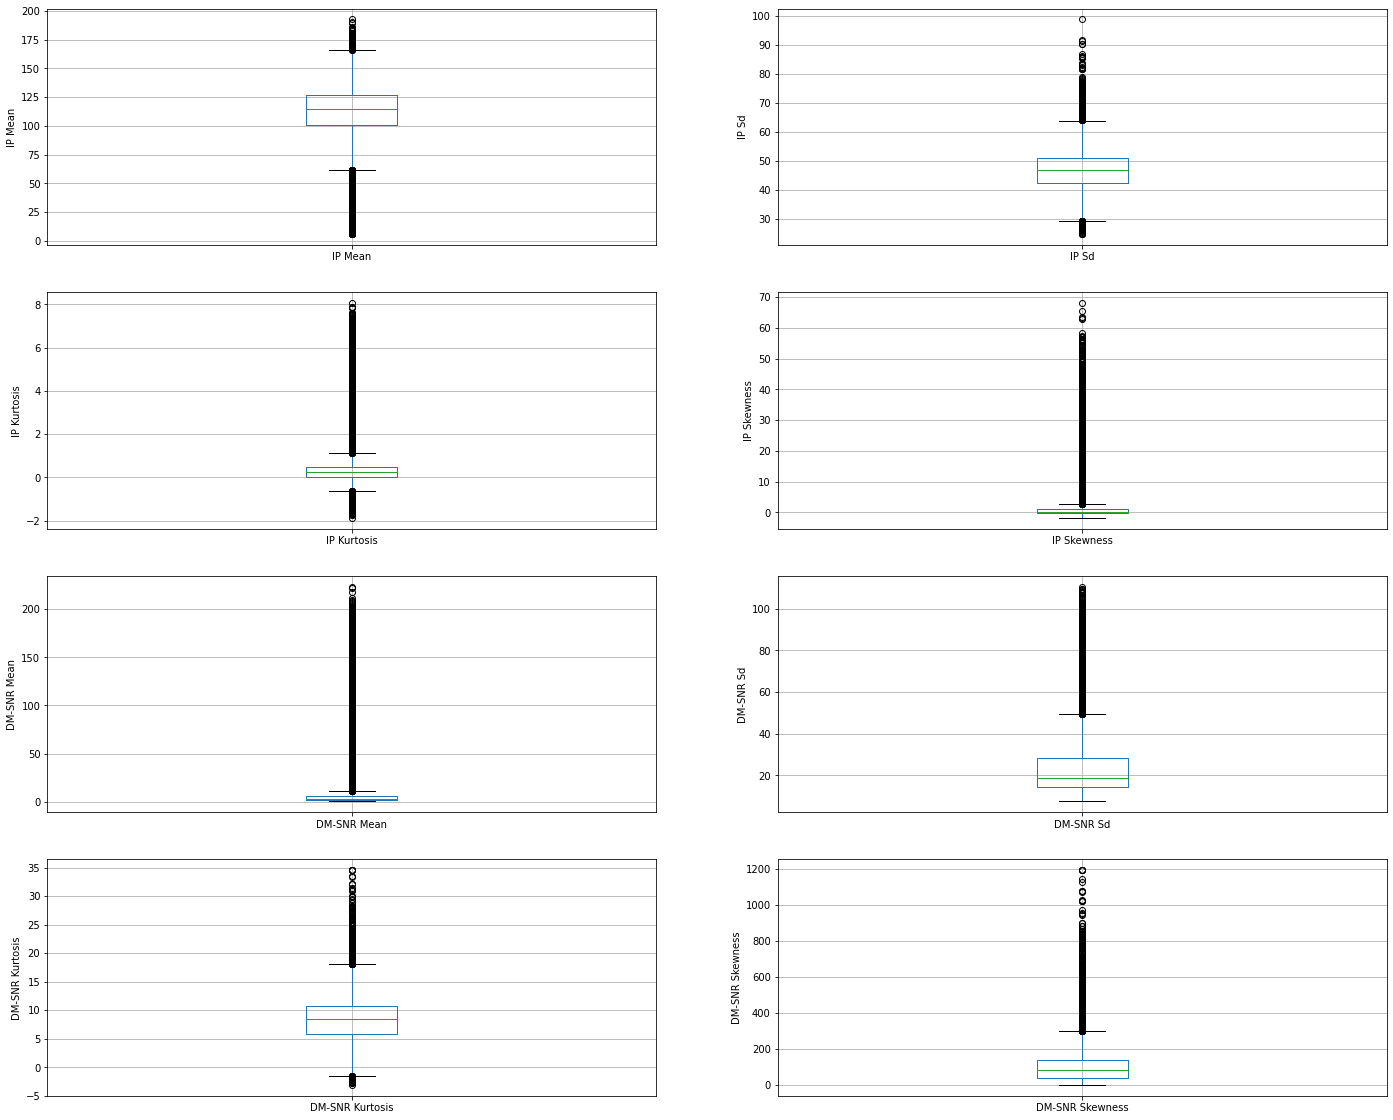

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

The above boxplots confirm that there are lot of outliers in these variables.

### Handle outliers with SVMs


There are 2 variants of SVMs. They are `hard-margin variant of SVM` and `soft-margin variant of SVM`.


The `hard-margin variant of SVM` does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.


Another version of SVM is called `soft-margin variant of SVM`. In this case, we can have a few points incorrectly classified or 
classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of `C` parameter, which controls the outliers. `Low C` implies we are allowing more outliers and `high C` implies less outliers.


The message is that since the dataset contains outliers, so the value of C should be high while training the model.

### Check the distribution of variables


Now, I will plot the histograms to check distributions to find out if they are normal or skewed. 

Text(0, 0.5, 'Number of pulsar stars')

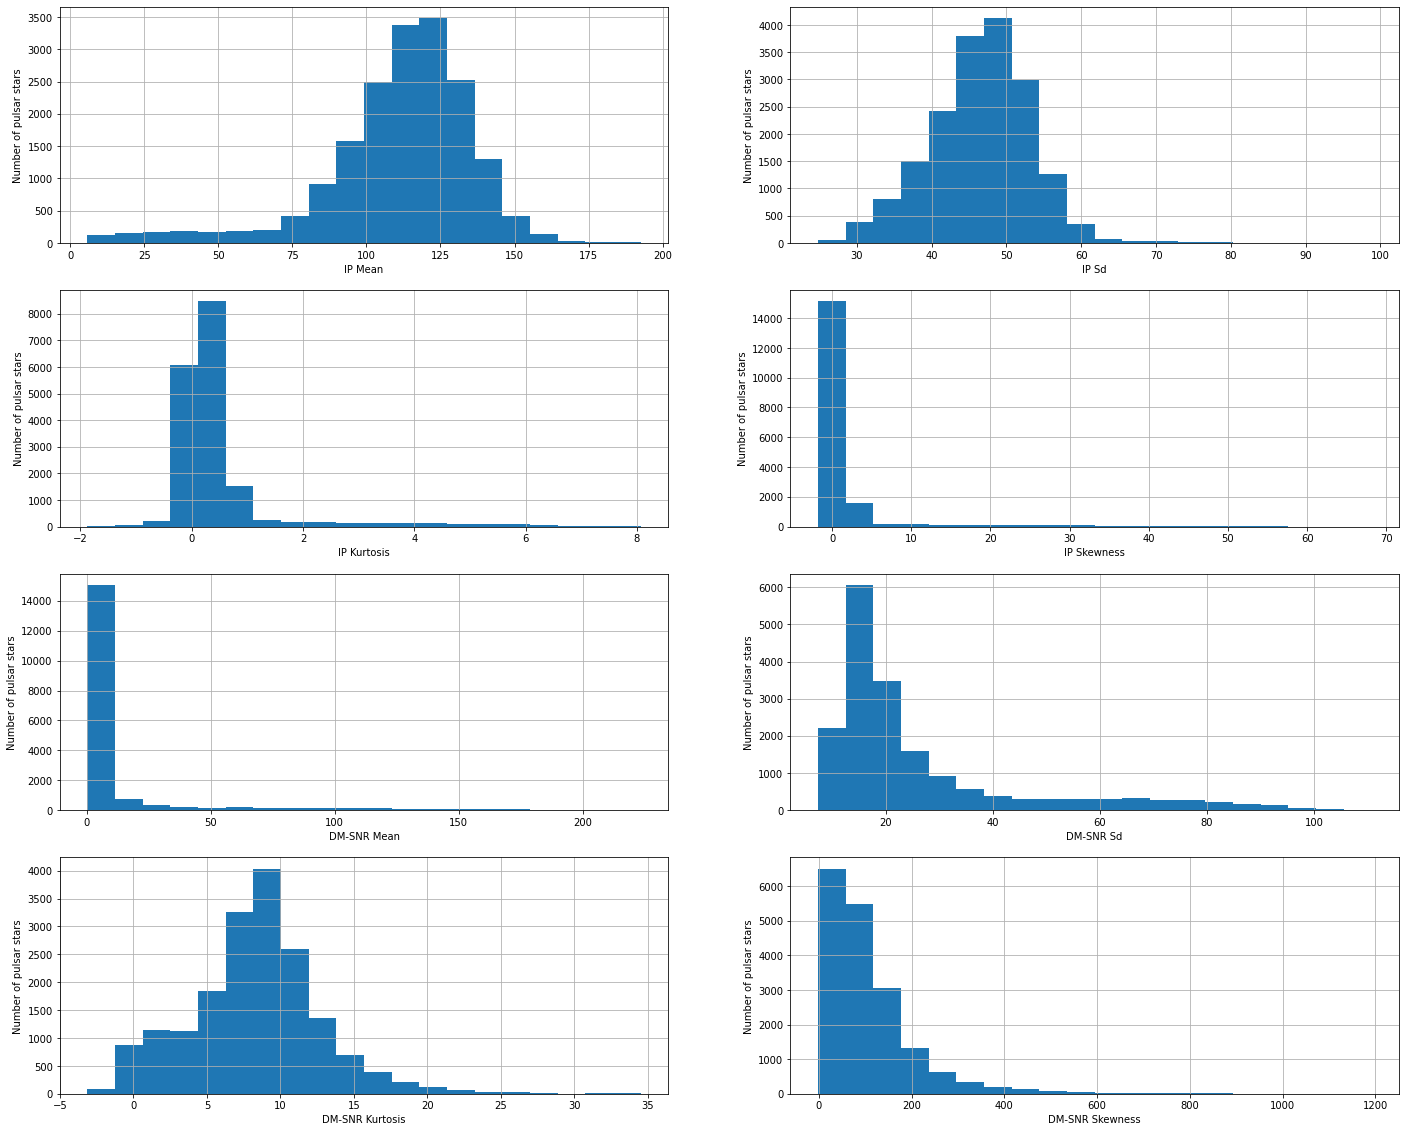

In [ ]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')


We can see that all the 8 continuous variables are skewed. 

# **Declare feature vector and target variable** <a class="anchor" id="9"></a>


In [ ]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

# **Split data into separate training and test set** <a class="anchor" id="10"></a>


In [ ]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((14318, 8), (3580, 8))

# **Feature Scaling** <a class="anchor" id="11"></a>


In [ ]:
cols = X_train.columns

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.986604e-16,-6.735622e-16,1.792879e-17,3.631409e-17,-8.459267e-17,-1.563912e-16,-1.277090e-17,1.172992e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


We now have `X_train` dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

# **Confusion matrix** <a class="anchor" id="16"></a>


In [ ]:
# Print the Confusion Matrix and slice it into four pieces
# visualize confusion matrix with seaborn heatmap



def plot_confusion_matrix(test, test_pred):

  cm = confusion_matrix(test, test_pred)
  cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

  sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **Run SVM with default hyperparameters** <a class="anchor" id="12"></a>


Default hyperparameter means C=1.0,  kernel=`rbf` and gamma=`auto` among other parameters.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with default hyperparameters: 0.9827


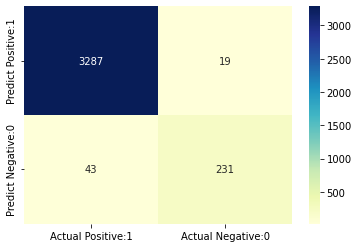

In [ ]:
# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
plot_confusion_matrix(y_test, y_pred)

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.92      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



### Run SVM with rbf kernel and C=100.0


We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. 
So, I will run SVM with kernel=`rbf` and C=100.0.

In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with rbf kernel and C=100.0 : 0.9832


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.92      0.86      0.89       274

    accuracy                           0.98      3580
   macro avg       0.95      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



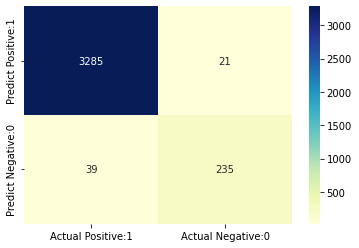

In [ ]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

We can see that we obtain a higher accuracy with C=100.0 as higher C means less outliers.

Now, I will further increase the value of C=1000.0 and check accuracy.

### Run SVM with rbf kernel and C=1000.0


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with rbf kernel and C=1000.0 : 0.9816


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.90      0.85      0.88       274

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.93      3580
weighted avg       0.98      0.98      0.98      3580



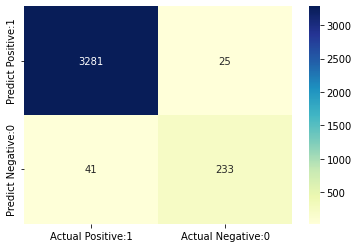

In [ ]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

In this case, we can see that the accuracy had decreased with C=1000.0

# **Run SVM with linear kernel** <a class="anchor" id="13"></a>



### Run SVM with linear kernel and C=1.0

In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with linear kernel and C=1.0 : 0.9830


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



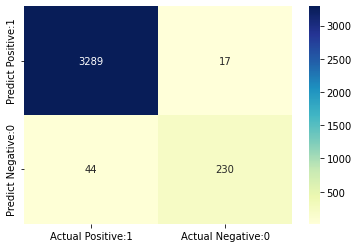

In [ ]:
plot_confusion_matrix(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))

### Run SVM with linear kernel and C=100.0

In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with linear kernel and C=100.0 : 0.9832


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.89       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



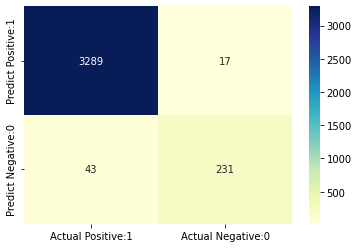

In [ ]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

### Run SVM with linear kernel and C=1000.0

In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with linear kernel and C=1000.0 : 0.9832


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.89       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



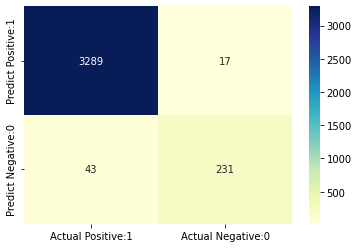

In [ ]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

We can see that we can obtain higher accuracy with C=100.0 and C=1000.0 as compared to C=1.0.

Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9783


We can see that the training set and test-set accuracy are very much comparable.

### Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Training set score: 0.9783
Test set score: 0.9830


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


The training-set accuracy score is 0.9783 while the test-set accuracy to be 0.9830. These two values are quite comparable. So, there is no question of overfitting. 


### Compare model accuracy with null accuracy


So, the model accuracy is 0.9832. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

In [ ]:
# check class distribution in test set

y_test.value_counts()

0    3306
1     274
Name: target_class, dtype: int64

We can see that the occurences of most frequent class `0` is 3306. So, we can calculate null accuracy by dividing 3306 by total number of occurences.

In [ ]:
# check null accuracy score

null_accuracy = (3306/(3306+274))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


We can see that our model accuracy score is 0.9830 but null accuracy score is 0.9235. So, we can conclude that our SVM classifier is doing a very good job in predicting the class labels.

# **Run SVM with polynomial kernel** <a class="anchor" id="14"></a>


### Run SVM with polynomial kernel and C=1.0

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with polynomial kernel and C=1.0 : 0.9807


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3306
           1       0.94      0.80      0.86       274

    accuracy                           0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



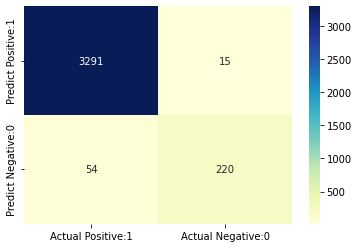

In [ ]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

 ### Run SVM with polynomial kernel and C=100.0

In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with polynomial kernel and C=1.0 : 0.9824


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.92      0.85      0.88       274

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



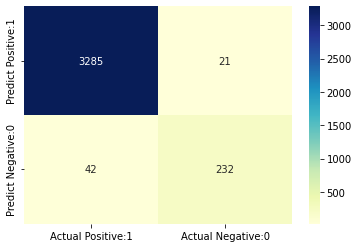

In [ ]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

Polynomial kernel gives poor performance. It may be overfitting the training set.

# **Run SVM with sigmoid kernel** <a class="anchor" id="15"></a>


### Run SVM with sigmoid kernel and C=1.0

In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3306
           1       0.29      0.33      0.31       274

    accuracy                           0.89      3580
   macro avg       0.61      0.63      0.62      3580
weighted avg       0.89      0.89      0.89      3580



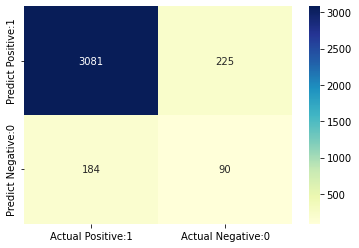

In [ ]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

### Run SVM with sigmoid kernel and C=100.0

In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with sigmoid kernel and C=100.0 : 0.8855


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3306
           1       0.28      0.33      0.31       274

    accuracy                           0.89      3580
   macro avg       0.61      0.63      0.62      3580
weighted avg       0.89      0.89      0.89      3580



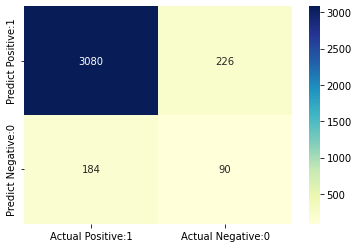

In [ ]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

We can see that sigmoid kernel is also performing poorly just like with polynomial kernel.

### Comments


We get maximum accuracy with `rbf` and `linear` kernel with C=100.0. and the accuracy is 0.9832. Based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, this is not true. Here, we have an imbalanced dataset. The problem is that accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem.


So, we must explore alternative metrices that provide better guidance in selecting models. In particular, we would like to know the underlying distribution of values and the type of errors our classifer is making.

# **Other models than SVM**

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3306
           1       0.78      0.84      0.80       274

    accuracy                           0.97      3580
   macro avg       0.88      0.91      0.89      3580
weighted avg       0.97      0.97      0.97      3580



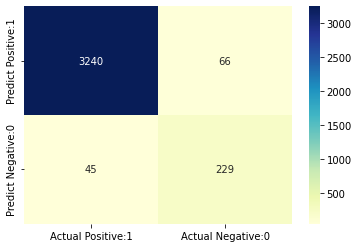

In [ ]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3306
           1       0.94      0.85      0.89       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



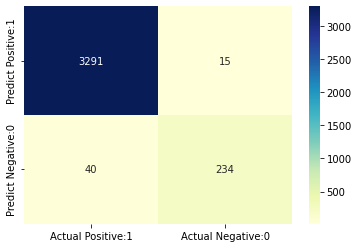

In [ ]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# **Results and conclusion** 



1. There are outliers in our dataset. So, as we increase the value of C to limit fewer outliers, the accuracy increased. This is true with different kinds of kernels.

2.	We get maximum accuracy with `rbf` and `linear` kernel with C=100.0 and the accuracy is 0.9832.  

3. The accuracy of `random forest classifier` is similar to the SVM models using the `rbf` and `linear` kernal with C=100.0

So, we can conclude that our model is doing a very good job in terms of predicting the class labels. But, this is not true. Here, we have an imbalanced dataset. Accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem. So, we must explore `confusion matrix` that provide better guidance in selecting models.

# **References** 

The work done in this project is inspired from following books and websites:-

  1. Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

  5. https://en.wikipedia.org/wiki/Support-vector_machine

  6. https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

  7. http://dataaspirant.com/2017/01/13/support-vector-machine-algorithm/

  8. https://www.ritchieng.com/machine-learning-evaluate-classification-model/

  9. https://en.wikipedia.org/wiki/Kernel_method

  10. https://en.wikipedia.org/wiki/Polynomial_kernel

  11. https://en.wikipedia.org/wiki/Radial_basis_function_kernel

  12. https://data-flair.training/blogs/svm-kernel-functions/

  13. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

  14. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html